Εισάγονται οι απαραίτητες βιβλιοθήκες

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest
import math
import seaborn as sns

# EXAMPLE 3.1

Διαβάζουμε το αρχείο CSV και αποθηκεύουμε τα δεδομένα σε ένα DataFrame με το όνομα "data". Εκτυπώνονται οι πρώτες 5 γραμμές του Dataframe. Η βάση δεδομένων περιέχει στοιχεία οδηγικής συμπεριφοράς (μέση ταχύτητα και επιτάχυνση) καθώς και την κατανάλωση καυσίμου, από ένα πείραμα πραγματικής οδήγησης. Κρατάμε στην Βαση Δεδομένων, μόνο τις στήλες 'identifier', 'trip_id', 'speed_avg' και 'obd_fuel_consumption'

In [2]:
data = pd.read_csv('qm_sfc.csv')
data= data[['identifier', 'trip_id', 'speed_avg','speed_urban_avg','speed_highway_avg','speed_rural_avg', 'duration','duration_urban', 'duration_highway', 'duration_rural', 'duration_driving', 'duration_driving_urban', 'duration_driving_highway', 'duration_driving_rural', 'distance_total','distance_urban', 'distance_highway', 'distance_rural','obd_fuel_consumption']].copy()
data.head()

,identifier,trip_id,speed_avg,speed_urban_avg,speed_highway_avg,speed_rural_avg,duration,duration_urban,duration_highway,duration_rural,duration_driving,duration_driving_urban,duration_driving_highway,duration_driving_rural,distance_total,distance_urban,distance_highway,distance_rural,obd_fuel_consumption
0,ecodriver008,0138DDB9-DBC9-417B-8D1F-BA0BF9661D8A,45.496765,39.420000,0.0,46.669474,136.0,22.0,0.0,114.0,136.0,22.0,0.0,114.0,1.702810,0.245095,0.0,1.457715,5.982437
1,ecodriver008,03C8082E-C4E1-47E5-ACDF-FAF37E6BEAA2,37.094610,33.016790,0.0,45.074519,2901.0,1947.0,0.0,954.0,2676.0,1771.0,0.0,905.0,27.514834,16.169600,0.0,11.345234,5.818384
2,ecodriver008,0A5A2AF6-8142-4AF6-86E5-02480E48BCCB,32.299333,28.117895,0.0,34.237073,220.0,57.0,0.0,163.0,180.0,57.0,0.0,123.0,1.597838,0.418554,0.0,1.179283,7.118644
3,ecodriver008,0C8608D1-E139-4BB1-AF4E-75E70831B74E,30.675505,29.952238,0.0,32.059028,1058.0,761.0,0.0,297.0,769.0,505.0,0.0,264.0,6.520763,4.148670,0.0,2.372093,6.401732
4,ecodriver008,1684BBC5-8E38-4BE0-928D-BFB0C059A75D,28.343428,32.533519,0.0,26.750013,240.0,74.0,0.0,166.0,196.0,54.0,0.0,142.0,1.512159,0.473162,0.0,1.038997,6.044678


In [3]:
speed_data = data[['speed_avg','speed_urban_avg']].copy()
speed_data.head()

,speed_avg,speed_urban_avg
0,45.496765,39.420000
1,37.094610,33.016790
2,32.299333,28.117895
3,30.675505,29.952238
4,28.343428,32.533519


Υπολογισμός εκατοστημορίων (25%, 50% (διάμεσος), 75%), αριθμητικού μέσου, ελάχιστης-μέγιστης τιμής, εύρος τιμών, ενδοτεταρτημοριακού εύρους, διακύμανσης, τυπικής απόκλισης, συντελεστή μεταβλητότητας της μέσης ταχύτητας της διαδρομής

In [4]:
#Εκατοστημόρια
quantiles = speed_data['speed_avg'].quantile([0.25, 0.5, 0.75])

# Αριθμητικός μέσος
mean = speed_data['speed_avg'].mean()

# Ελάχιστη and Μέγιστη τιμή
min_val = speed_data['speed_avg'].min()
max_val = speed_data['speed_avg'].max()

# Εύρος
range_val = speed_data['speed_avg'].max() - speed_data['speed_avg'].min()

# Ενδοτεταρτημοριακό εύρος
q1 = speed_data['speed_avg'].quantile(0.25)
q3 = speed_data['speed_avg'].quantile(0.75)
iqr = q3 - q1

# Διακύμανση
variance = speed_data['speed_avg'].var()

# Τυπική απόκλιση
std_dev = speed_data['speed_avg'].std()

# Συντελεστής μεταβλητότητας
cv = (speed_data['speed_avg'].std() / speed_data['speed_avg'].mean()) * 100

Εκτύπωση αποτελεσμάτων στο 3 δεκαδικό ψηφίο

In [5]:
print("- Εκατοστημόρια:")
print(quantiles.round(3))
print("- Μέση τιμή:", round(mean, 3))
print("- Ελάχιστη τιμή:", round(min_val, 3))
print("- Μέγιστη τιμή:", round(max_val, 3))
print("- Εύρος:", round(range_val, 3))
print("- Ενδοτεταρτημοριακό εύρος:", round(iqr, 3))
print("- Διακύμανση:", round(variance, 3))
print("- Τυπική απόκλιση:", round(std_dev, 3))
print("- Συντελεστής μεταβλητότητας:", round(cv, 3))

- Εκατοστημόρια:
0.25    28.675
0.50    33.859
0.75    45.282
Name: speed_avg, dtype: float64
- Μέση τιμή: 40.776
- Ελάχιστη τιμή: 15.06
- Μέγιστη τιμή: 122.601
- Εύρος: 107.542
- Ενδοτεταρτημοριακό εύρος: 16.607
- Διακύμανση: 384.176
- Τυπική απόκλιση: 19.6
- Συντελεστής μεταβλητότητας: 48.068


O υπολογισμός των εκατοστημορίων (25%, 50% (διάμεσος), 75%), αριθμητικού μέσου, ελάχιστης-μέγιστης τιμής και τυπικής απόκλισης της μέσης ταχύτητας της διαδρομής δύναται να υλοποιηθεί και μέσω της εντολής describe() 

In [6]:
speed_data['speed_avg'].describe()

count    3524.000000
mean       40.776157
std        19.600408
min        15.059732
25%        28.674813
50%        33.858974
75%        45.281650
max       122.601430
Name: speed_avg, dtype: float64

Ιστόγραμμα της μέσης ταχύτητας ανά διαδρομή και αντίστοιχο διάγραμμα διακύμανσης

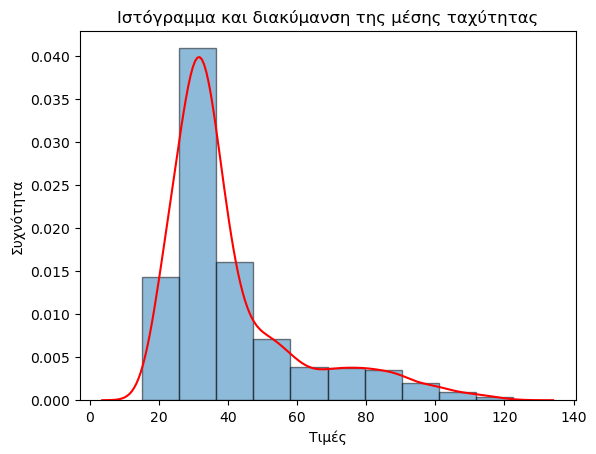

In [7]:
# Δημιουργία του ιστογράμματος
plt.hist(speed_data['speed_avg'], bins=10, edgecolor='black', density=True, alpha=0.5)

# Δημιουργία του γραφήματος διακύμνασης
sns.kdeplot(speed_data['speed_avg'], color='red')

# Προσθήκη ετικετών και τίτλου
plt.xlabel('Τιμές')
plt.ylabel('Συχνότητα')
plt.title('Ιστόγραμμα και διακύμανση της μέσης ταχύτητας')

# Εμφάνιση του γραφήματος
plt.show()

Βασιζόμενοι στα αποτελέσματα που προκύπτουν από την ανάλυση των δεδομένων, μπορούμε να περιγράψουμε την κατανομή της μέσης ταχύτητας ταξιδιού των οδηγών που συμμετείχαν στο πείραμα. Η μέση τιμή είναι 40.776 km/h. Η ελάχιστη τιμή είναι 15.06 km/h και η μέγιστη τιμή είναι 122.601 km/h, με ένα εύρος των τιμών που φτάνει 107.542. Το ενδοτεταρτημοριακό εύρος, που υπολογίζεται από τη διαφορά μεταξύ του τρίτου και πρώτου τεταρτημορίου, είναι 16.607. Η διακύμανση των τιμών είναι 384.176, ενώ η τυπική απόκλιση είναι 19.6. Το γεγονός ότι ο συντελεστής μεταβλητότητας είναι 48.068 δείχνει μια σχετικά μεγάλη απόκλιση των τιμών από τη μέση τιμή τους. Οι τιμές του μέσου όρου και του διαμέσου έχουν σημαντική διαφορά, υποδεικνύοντας ότι η κατανομή του δείγματος ταχυτήτων δεν είναι συμμετρική. Το ίδιο διαφαίνεται και από το ιστόγραμμα που δημιουργήθηκε.

In [8]:
speed_data[['speed_avg','speed_urban_avg']].describe()

,speed_avg,speed_urban_avg
count,3524.000000,3524.000000
mean,40.776157,31.730438
std,19.600408,8.294246
min,15.059732,0.000000
25%,28.674813,26.333691
50%,33.858974,31.419029
75%,45.281650,36.212481
max,122.601430,77.939137


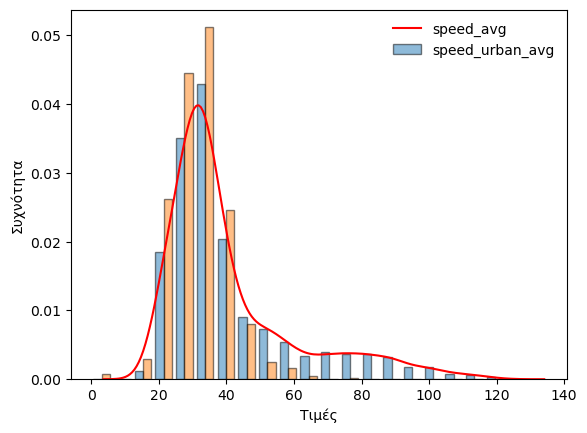

In [16]:
# Δημιουργία του ιστογράμματος
plt.hist(speed_data[['speed_avg','speed_urban_avg']], bins=20, edgecolor='black', density=True, alpha=0.5)

# Δημιουργία του γραφήματος διακύμνασης
sns.kdeplot(speed_data['speed_avg'], color='red')

# Προσθήκη ετικετών και τίτλου
plt.xlabel('Τιμές')
plt.ylabel('Συχνότητα')
#plt.title('Ιστόγραμμα και διακύμανση της μέσης ταχύτητας')
plt.legend(['speed_avg','speed_urban_avg'], frameon=False)
# Εμφάνιση του γραφήματος
plt.show()

<Axes: >

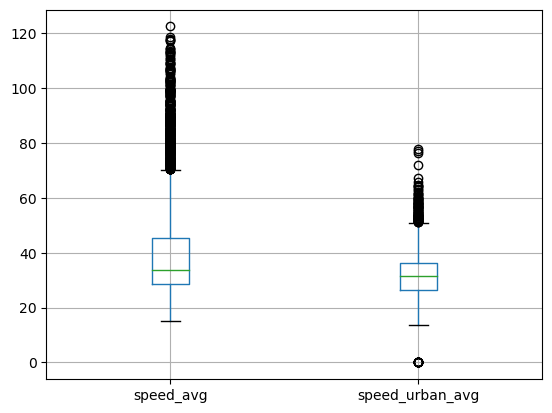

In [17]:
speed_data[['speed_avg','speed_urban_avg']].boxplot()

# EXAMPLE 3.2

Υπολογισμός ασυμμετρίας και κύρτωσης της κατανομής της μέσης ταχύτητας

In [18]:
# Υπολογισμός ασυμμετρίας και κύρτωσης 
skewness = speed_data[['speed_avg','speed_urban_avg']].skew()
kurtosis = speed_data[['speed_avg','speed_urban_avg']].kurtosis()

Εκτύπωση αποτελεσμάτων ασυμμετρίας και κύρτωσης της κατανομής της μέσης ταχύτητας

In [19]:
print("Ασυμμετρία:", round(skewness, 3))
print("Κύρτωση:", round(kurtosis, 3))

Ασυμμετρία: speed_avg          1.641
speed_urban_avg    0.563
dtype: float64
Κύρτωση: speed_avg          2.195
speed_urban_avg    2.405
dtype: float64


Με βάση τα αποτελέσματα της ασυμμετρίας και της κύρτωσης της κατανομής της μέσης ταχύτητας διαδρομής, συμπεραίνεται ότι η κατανομή έχει θετική ασυμμετρία και είναι λεπτόκυρτη.

# EXAMPLE 3.3

Για το παράδειγμα αυτό χρησιμοποιούμε μια βάση δεδομένων που περιέχει την εβδομαδιαία εξέλιξη της τιμής της αμόλυβδης βενζίνης και του συνολικού αριθμού των ακυρώσεων εισιτηρίων στο μετρό. Διαβάζουμε το αρχείο scv και αποθηκεύουμε τα δεδομένα σε ένα DataFrame με το όνομα "fuel_data".

In [20]:
valid_data = pd.read_csv('qm_validations.csv',delimiter=";")
df=valid_data[['avg_fuel_attica','tot_metro_valid']]
valid_data.head()

,week22,avg_fuel_attica,tot_metro_valid
0,1,1.7182,2341596
1,2,1.7348,4151463
2,3,1.7590,4439716
3,4,1.7796,2569046
4,5,1.8100,4584155


Δημιουργία διαγράμματος διασποράς της μέσης τιμής αμόλυβδης βενζίνης και του συνολικού αριθμού των ακυρώσεων εισιτηρίων στο μετρό.

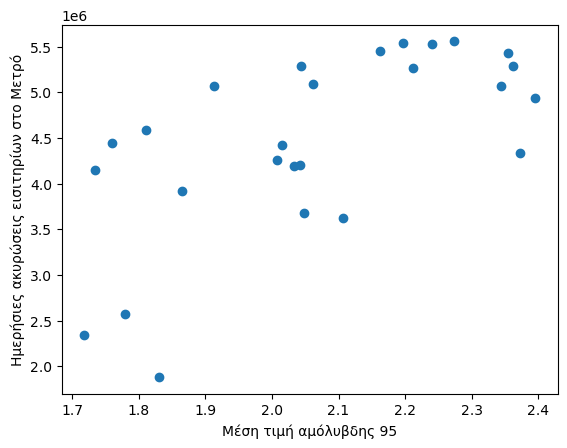

In [21]:
# Διάγραμμα διασποράς
plt.scatter(df['avg_fuel_attica'], df['tot_metro_valid'])
plt.xlabel('Μέση τιμή αμόλυβδης 95')
plt.ylabel('Ημερήσιες ακυρώσεις εισιτηρίων στο Μετρό')

plt.show()

Υπολογισμός συντελεστή συσχέτισης Pearson και εκτύπωση της τιμής

In [42]:
# Υπολογισμός συντελεστή συσχέτισης Pearson
pcor=df.corr(method ='pearson')
# Εκτύπωση αποτελεσμάτων
print(pcor)

                 avg_fuel_attica  tot_metro_valid
avg_fuel_attica         1.000000         0.648973
tot_metro_valid         0.648973         1.000000


Με βάση τα αποτελέσματα παρατηρούμε μια ασθενή θετική συσχέτιση της μέσης τιμής καυσίμου και των επιβατών του Μετρό. Επιπλέον, το ίδιο υποδηλώνει και ο συντελεστής Pearson με τιμή 0,649. Τα αποτελέσματα είναι λογικά, καθώς είναι αναμενόμενο όσο αυξάνεται η μέση τιμή αμόλυβδης βενζίνης μιας περιοχής, αυτό θα έχει μία σχετικά αυξητική επιρροή στον αριθμού των ακυρώσεων εισιτηρίων στο μετρό.

Θα πρέπει να σημειωθεί ότι ο συντελεστής συσχέτησης κατά Pearson υποθέτει ότι οι μεταβλητές είναι κανονικά κατανεμημένες. Για να ελέγξουμε το παραπάνω, δημιουργούμε τα διαγράμματα Normal QQplot που συγκρίνει τα ποσοστιαία σημεία των δεδομένων μιας μεταβλητής με την κανονική κατανομή. Αν τα δεδομένα μασ είναι κανονικά κατανεμημένα, θα τοποθετούνται πάνω σε μία ευθεία γραμμή. 

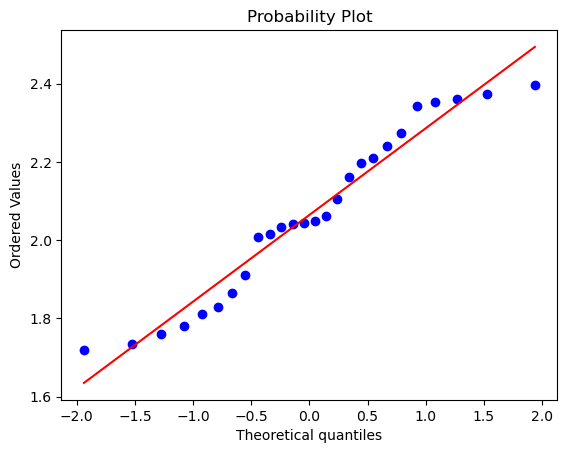

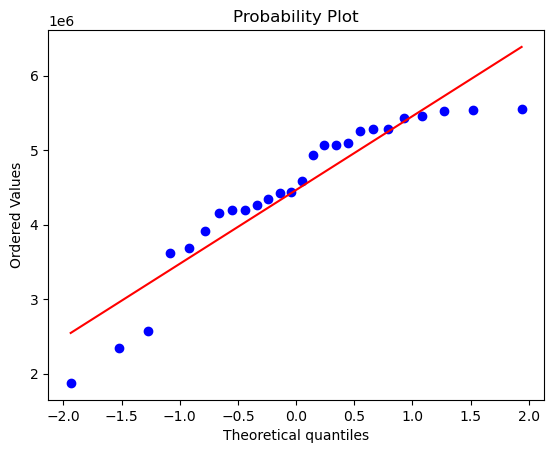

In [65]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df['avg_fuel_attica'], dist="norm", plot=plt)
plt.show()

stats.probplot(df['tot_metro_valid'], dist="norm", plot=plt)
plt.show()


In [70]:
Παρατηρούμε ότι τα δεδομένα αποκλίνουν ελαφρώς από τη διαγώνιο, οπότε θεωρούμε ότι δεν είναι κανονικά κατανεμημένα. Στην περίπτωση αυτή ο υπολογισμός της συσχέτισης κατά Kendall ή Spearman είναι πιο σωστός.

SyntaxError: invalid syntax (3848923733.py, line 1)

In [67]:
# Υπολογισμός συντελεστή συσχέτισης Kendall tau
kcor=df.corr(method ='kendall')
# Υπολογισμός συντελεστή συσχέτισης Kendall tau
scor=df.corr(method ='spearman')
# Εκτύπωση αποτελεσμάτων
pcor=print(pcor)
kcor=print(kcor)
scor=print(scor)

                 avg_fuel_attica  tot_metro_valid
avg_fuel_attica         1.000000         0.648973
tot_metro_valid         0.648973         1.000000
                 avg_fuel_attica  tot_metro_valid
avg_fuel_attica         1.000000         0.415385
tot_metro_valid         0.415385         1.000000
                 avg_fuel_attica  tot_metro_valid
avg_fuel_attica         1.000000         0.620513
tot_metro_valid         0.620513         1.000000


In [68]:
Φαίνεται ότι η εκτίμηση του συντελεστή συσχέτισης κατά Kendall είναι πιο αυστηρή σε σχέση με αυτές κατά Pearson και Spearman.

SyntaxError: invalid syntax (1417867845.py, line 1)

# EXAMPLE 3.4

Το παράδειγμα αυτό αφορά τη διενέργεια στατιστικού τεστ με μηδενική υπόθεση ότι η μέση ταχύτητα διαδρομής ισούται με 40 km/h και εκτύπωση των σχετικών αποτελεσμάτων.

In [73]:
# Στατιστικό τεστ για μέσης ταχύτητα 40 km/h
population_mean = 40 #km/h

# Εξαγωγή της στήλης ως πίνακα numpy
column_data = data['speed_avg'].values

# Εκτέλεση t-test ενός δείγματος
t_statistic, p_value = ttest_1samp(column_data, population_mean)

#Εκτύπωση αποτελεσμάτων
print("Στατιστικό τεστ:", round(t_statistic,3))
print("Τιμή p-value:", p_value)

Στατιστικό τεστ: 2.351
Τιμή p-value: 0.01879153520947247


Δεδομένου ότι η απόλυτη τιμή του στατιστικού τεστ είναι μεγαλύτερη από 1.96, την κρίσιμη τιμή για έναν δίπλευρο έλεγχο με επίπεδο σημαντικότητας 5%, η μηδενική υπόθεση απορρίπτεται (όπως επίσης είναι ξεκάθαρο και από την τιμή του p-value). 

# EXAMPLE 3.5

Υπολογίζεται το πραγματικό ποσοστό των διαδρομών που είχαν μέση ταχύτητα διαδρομής άνω των 70 km/h

In [77]:
#Υπολογισμός του ποσοστού των διαδρομών άνω των 70 km/h
percentage_above_70 = (data['speed_avg'] > 70).mean() * 100
print("Ποσοστό τιμών άνω 70 km/h:", round(percentage_above_70,3), "%")

Ποσοστό τιμών άνω 70 km/h: 11.124 %


Διενέργεια στατιστικού τεστ (έλεγχος για την αναλογία p) με μηδενική υπόθεση ότι το 20% των ταξιδιών έχει μέση ταχύτητα μεγαλύτερη από 70 km/h.

In [78]:
statistic, p_value=proportions_ztest(count=0.2*len(data), nobs=len(data), value=0.1469)

Εκτύπωση αποτελεσμάτων

In [79]:
print("Στατιστική z:", round(statistic,3))
print("Τιμή p-value:", round(p_value,3))

Στατιστική z: 7.88
Τιμή p-value: 0.0


Δεδομένου ότι η απόλυτη τιμή του στατιστικού τεστ = 7.88 (έλεγχος για την αναλογία p) είναι μεγαλύτερη από 1.96, την κρίσιμη τιμή για έναν έλεγχο με δύο ουρές σε επίπεδο σημαντικότητας 5%, η μηδενική υπόθεση απορρίπτεται. Συνεπώς, υπάρχουν επαρκή στοιχεία για να συμπεράνουμε ότι το ποσοστό των διαδρομών που η μέση ταχύτητα είναι μεγαλύτερη των 70 km/h δεν είναι 20% βασιζόμενοι στην υπάρχουσα βάση δεδομένων.

# EXAMPLE 3.6

Επιλογή δύο οδηγών για σύγκριση των μέσων όρων των ταχυτήτων των διαδρομών τους και εκτύπωση του αριθμού των διαδρομών

In [90]:
#Επιλογή 2 οδηγών με αρκετά ταξίδια
driver1=data[data['identifier']=='ecodriver043']
driver2=data[data['identifier']=='ecodriver027']

# Αριθμητικός μέσος ΄όρος και διακύμανση
mean1 = driver1['speed_avg'].mean()
mean2 = driver2['speed_avg'].mean()
var1 = driver1['speed_avg'].var()
var2 = driver2['speed_avg'].var()

# Εκτύπωση των αριθμών των ταξιδιών του εκάστοτε οδηγού
print("Διαδρομές του οδηγού 1:", len(driver1))
print("Διαδρομές του οδηγού 2:", len(driver2))
print("Μέσος όρος οδηγού 1:",mean1)
print("Μέσος όρος οδηγού 2:",mean2)
print("Διακύμανση οδηγού 1:",var1)
print("Διακύμανση οδηγού 2:",var2)


Διαδρομές του οδηγού 1: 671
Διαδρομές του οδηγού 2: 608
Μέσος όρος οδηγού 1: 40.017456335990595
Μέσος όρος οδηγού 2: 27.8936368288773
Διακύμανση οδηγού 1: 466.36617943075686
Διακύμανση οδηγού 2: 76.18255556718383


Διενέργεια στατιστικού τεστ για τους μέσους όρους των δύο οδηγών

In [42]:
# Υπολογισμός στατιστικού ελέγχου και της τιμής p-value
test_statistic, p_value = stats.ttest_ind(driver1['speed_avg'], driver2['speed_avg'])

Εκτύπωση αποτελεσμάτων

In [43]:
print("Στατιστικό τεστ:", round(test_statistic,3))
print("Τιμή p-value:", round(p_value,3))

Στατιστικό τεστ: 12.919
Τιμή p-value: 0.0


Το t-statistic είναι μεγαλύτερο από 1,96, την κρίσιμη τιμή για έναν δίπλευρο έλεγχο σε επίπεδο σημαντικότητας 5%, και έτσι η μηδενική υπόθεση απορρίπτεται. Το αποτέλεσμα αυτό δείχνει ότι η μέση ταχύτητα των διαδρομών του οδηγού 1 είναι διαφορετική από του οδηγού 2 και αυτή η διαφορά δεν είναι πιθανό να προέκυψε τυχαία.

Υπολογισμός Διαστήματος Εμπιστοσύνης

In [44]:
import scipy.stats as stats

# Ορισμός του επιθυμητού επιπέδου εμπιστοσύνης (π.χ. 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Υπολογισμός των βαθμών ελευθερίας
df = len(driver1['speed_avg']) + len(driver2['speed_avg']) - 2

# Υπολογισμός τυπικού σφάλματος
std_error = np.sqrt((np.var(driver1['speed_avg']) / len(driver1['speed_avg'])) +
                    (np.var(driver2['speed_avg']) / len(driver2['speed_avg'])))

# Υπολογισμός του περιθωρίου σφάλματος
margin_of_error = stats.t.ppf(1 - alpha / 2, df) * std_error

# Μέση διαφορά
mean_difference = np.mean(driver1['speed_avg']) - np.mean(driver2['speed_avg'])

# Διάστημα εμπιστοσύνης
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

# Εκτύπωση αποτελεσμάτων
print("Διάστημα εμπιστοσύνης:", confidence_interval)

Διάστημα εμπιστοσύνης: (10.348298959959985, 13.899340054266608)


Με επίπεδο εμπιστοσύνης 95% η διαφορά των μέσων ταχυτήτων των διαδρομών των δύο οδηγών είναι μεταξύ 10.348 και 13.899 km/h.